In [1]:
import math
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization

from sklearn import preprocessing
from sklearn.model_selection import train_test_split # data split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as accuracy

def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

Data = pd.read_csv('df_after_FINAL.csv')

df = pd.DataFrame(Data, columns = ['RegionName', 'State','Date', 'Price', 'Housing Inventory', 'UnemploymentRate',
                                   'cases_rate', 'death_rate', 'fully_vaccinated_rate', 'inventory_price_increased',
                                   'inventory_price_decreased', 'median_days_on_market', 'Population', 'Area',
                                   'GDP_pp', 'Population_Density', 'Violent_Crimes_pp', 'Property_Crimes_pp',
                                   'Revenue_pp', 'Expenditures_pp', 'Hospital_pp', 'School_pp', 'Public_School_pp',
                                   'Private_School_pp'])
df = df.loc[:1333]
df.dropna(inplace = True)

# df.head(10000)


In [2]:
X_var = df[['Housing Inventory', 'UnemploymentRate', 'cases_rate', 'death_rate', 'fully_vaccinated_rate', 
            'inventory_price_increased', 'inventory_price_decreased', 'median_days_on_market', 'Population', 
            'Area', 'GDP_pp', 'Population_Density', 'Violent_Crimes_pp', 'Property_Crimes_pp', 'Revenue_pp', 
            'Expenditures_pp', 'Hospital_pp', 'School_pp', 'Public_School_pp', 'Private_School_pp']].values

y_var = df['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [3]:
# 1. Linear Regression

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)
ols_yhat_train = ols.predict(X_train)

# 2. Ridge

ridge = Ridge(alpha = 0.05)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)
ridge_yhat_train = ridge.predict(X_train)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)
lasso_yhat_train = lasso.predict(X_train)

# 4. Bayesian

# bayesian = BayesianRidge()
# bayesian.fit(X_train, y_train)
# bayesian_yhat = bayesian.predict(X_test)
# bayesian_yhat_train = bayesian.predict(X_train)

# 5. Decision Tree

dt = DecisionTreeRegressor(criterion='mse',max_depth=6)
dt.fit(X_train, y_train)
dt_yhat = dt.predict(X_test)
dt_yhat_train = dt.predict(X_train)

# 6. Random Forest Regressor

rf = RandomForestRegressor(criterion='mse', n_estimators=100, max_depth=6, random_state=3)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)
rf_yhat_train = rf.predict(X_train)

# 7. Support Vector Regressor

# sv = SVR(C=50, kernel='rbf', gamma=0.01)
# sv.fit(X_train, y_train)
# svr_yhat = sv.predict(X_test)
# svr_yhat_train = sv.predict(X_train)

# 8. K-Nearest Neighbor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)
knn_yhat = knn.predict(X_test)
knn_yhat_train = knn.predict(X_train)


/Users/hxyanthony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8419155100516.694, tolerance: 10227068698.89946
  model = cd_fast.enet_coordinate_descent(


In [4]:
# 1. Explained Variance Score

print('EXPLAINED VARIANCE SCORE:')
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Linear Regression model is {}'.format(evs(y_test, ols_yhat)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)))
print('-------------------------------------------------------------------------------')
# print('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)))
# print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Decision Tree is {}'.format(evs(y_test, dt_yhat)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Random Forest Regression is {}'.format(evs(y_test, rf_yhat)))
print('-------------------------------------------------------------------------------')
# print('Explained Variance Score of SVR is {}'.format(evs(y_test, svr_yhat)))
# print('-------------------------------------------------------------------------------')
print('Explained Variance Score of KNN is {}'.format(evs(y_test, knn_yhat)))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of Linear Regression model is 0.8483829804010402
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.8459559681228789
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.8474079231394412
-------------------------------------------------------------------------------
Explained Variance Score of Decision Tree is 0.97550930156439
-------------------------------------------------------------------------------
Explained Variance Score of Random Forest Regression is 0.9829126877698638
-------------------------------------------------------------------------------
Explained Variance Score of KNN is 0.9817125045283823
-------------------------------------------------------------------------------


In [5]:
# 2. R-squared

print('R-SQUARED:')
print('-------------------------------------------------------------------------------')
print('R-Squared of Linear Regression model is {}'.format(r2(y_test, ols_yhat)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)))
print('-------------------------------------------------------------------------------')
# print('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)))
# print('-------------------------------------------------------------------------------')
print('R-Squared of Decision Tree is {}'.format(r2(y_test, dt_yhat)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Random Forest Regression is {}'.format(r2(y_test, rf_yhat)))
print('-------------------------------------------------------------------------------')
# print('R-Squared of SVR is {}'.format(r2(y_test, svr_yhat)))
# print('-------------------------------------------------------------------------------')
print('R-Squared of KNN is {}'.format(r2(y_test, knn_yhat)))
print('-------------------------------------------------------------------------------')


R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of Linear Regression model is 0.8483246185571813
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.8459514827313548
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.8473980251665183
-------------------------------------------------------------------------------
R-Squared of Decision Tree is 0.9754802016494761
-------------------------------------------------------------------------------
R-Squared of Random Forest Regression is 0.9828959507014299
-------------------------------------------------------------------------------
R-Squared of KNN is 0.9817029717828998
-------------------------------------------------------------------------------


In [13]:
# 3. MSE

print('MSE:')
print('-------------------------------------------------------------------------------')
print('MSE of Linear Regression model is {}'.format(mse(y_test, ols_yhat)))
print('-------------------------------------------------------------------------------')
print('MSE of Ridge model is {}'.format(mse(y_test, ridge_yhat)))
print('-------------------------------------------------------------------------------')
print('MSE of Lasso model is {}'.format(mse(y_test, lasso_yhat)))
print('-------------------------------------------------------------------------------')
# print('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)))
# print('-------------------------------------------------------------------------------')
print('MSE of Decision Tree is {}'.format(mse(y_test, dt_yhat)))
print('-------------------------------------------------------------------------------')
print('MSE of Random Forest Regression is {}'.format(mse(y_test, rf_yhat)))
print('-------------------------------------------------------------------------------')
# print('R-Squared of SVR is {}'.format(r2(y_test, svr_yhat)))
# print('-------------------------------------------------------------------------------')
print('MSE of KNN is {}'.format(mse(y_test, knn_yhat)))
print('-------------------------------------------------------------------------------')


MSE:
-------------------------------------------------------------------------------
MSE of Linear Regression model is 18457381808.92253
-------------------------------------------------------------------------------
MSE of Ridge model is 18746168780.18343
-------------------------------------------------------------------------------
MSE of Lasso model is 18570138986.98532
-------------------------------------------------------------------------------
MSE of Decision Tree is 2983815011.561562
-------------------------------------------------------------------------------
MSE of Random Forest Regression is 2081392282.5132952
-------------------------------------------------------------------------------
MSE of KNN is 2226565923.6134167
-------------------------------------------------------------------------------


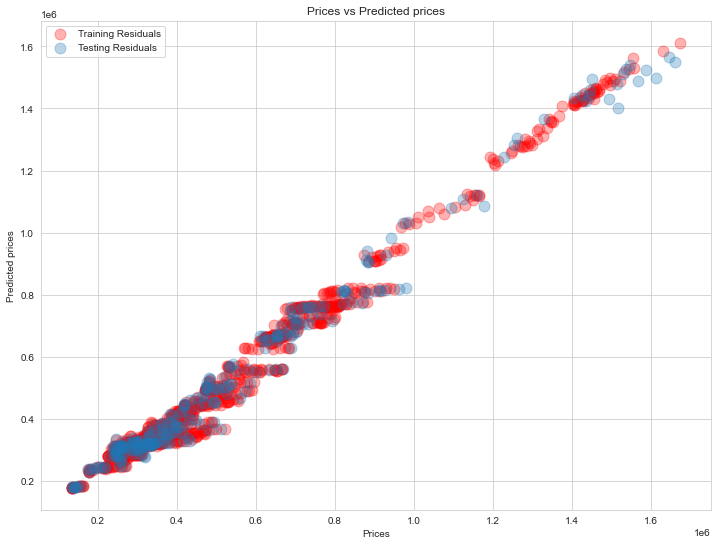

In [7]:
# Visualizing the differences between actual prices and predicted values
plt.figure(figsize=(12,9))
plt.scatter(y_train, rf_yhat_train, alpha=0.3, s=120, c='r')
plt.scatter(y_test, rf_yhat, alpha=0.3, s=120)

plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.legend(["Training Residuals","Testing Residuals"])
plt.show()


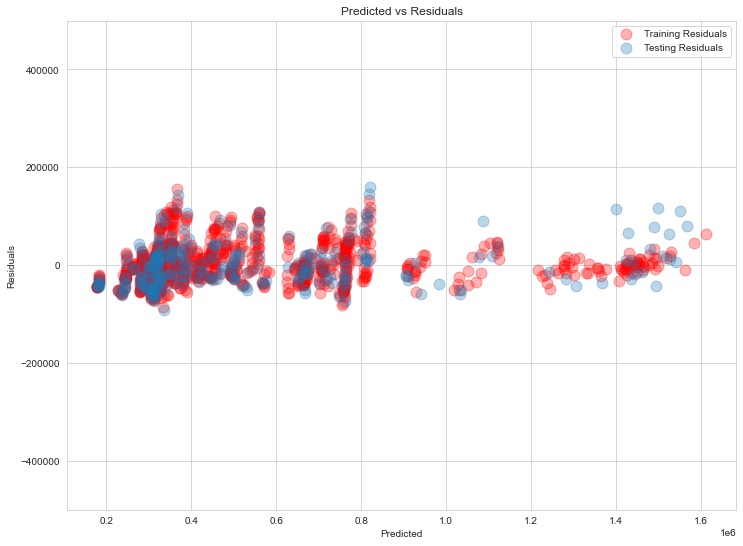

In [8]:
plt.figure(figsize=(12,9))
plt.scatter(rf_yhat_train,y_train-rf_yhat_train, alpha=0.3, s=120, c='r')
plt.scatter(rf_yhat,y_test-rf_yhat, alpha=0.3, s=120)

plt.title("Predicted vs Residuals")
plt.ylim([-500000, 500000])
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.legend(["Training Residuals","Testing Residuals"])
plt.show()

/Users/hxyanthony/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hxyanthony/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


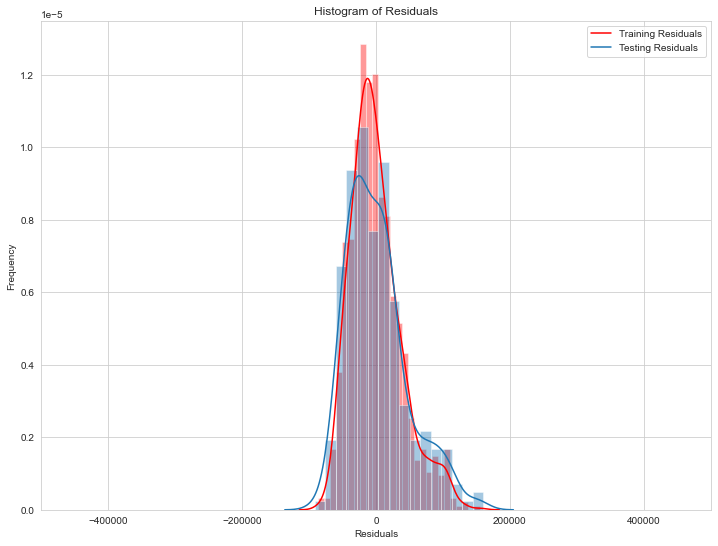

In [9]:
# Checking Normality of errors
plt.figure(figsize=(12,9))
sb.distplot(y_train-rf_yhat_train,color='r')
sb.distplot(y_test-rf_yhat)
plt.title("Histogram of Residuals")
plt.xlim([-500000, 500000])
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend(["Training Residuals","Testing Residuals"])
plt.show()


/Users/hxyanthony/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hxyanthony/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hxyanthony/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

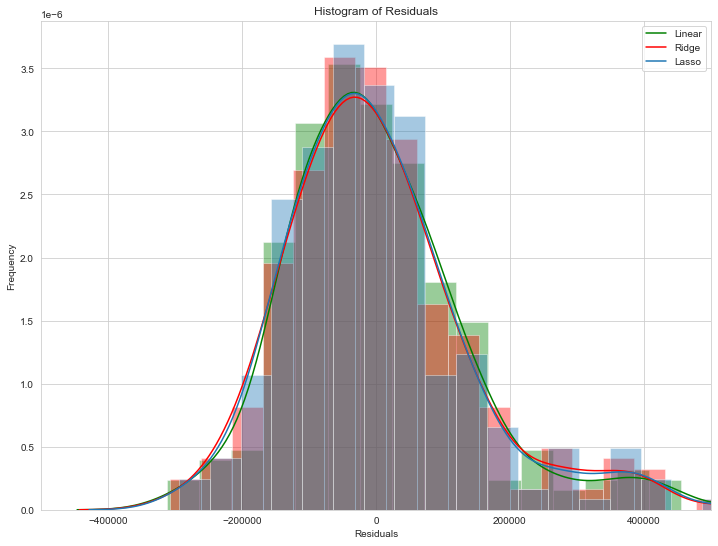

In [10]:
# Checking Normality of errors
plt.figure(figsize=(12,9))
# sb.distplot(y_train-ols_yhat_train)
sb.distplot(y_test-ols_yhat, color='g')

# sb.distplot(y_train-ridge_yhat_train)
sb.distplot(y_test-ridge_yhat, color='r')

# sb.distplot(y_train-lasso_yhat_train)
sb.distplot(y_test-lasso_yhat)

plt.title("Histogram of Residuals")
plt.xlim([-500000, 500000])
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend(["Linear","Ridge", "Lasso"])
plt.show()

/Users/hxyanthony/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hxyanthony/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hxyanthony/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

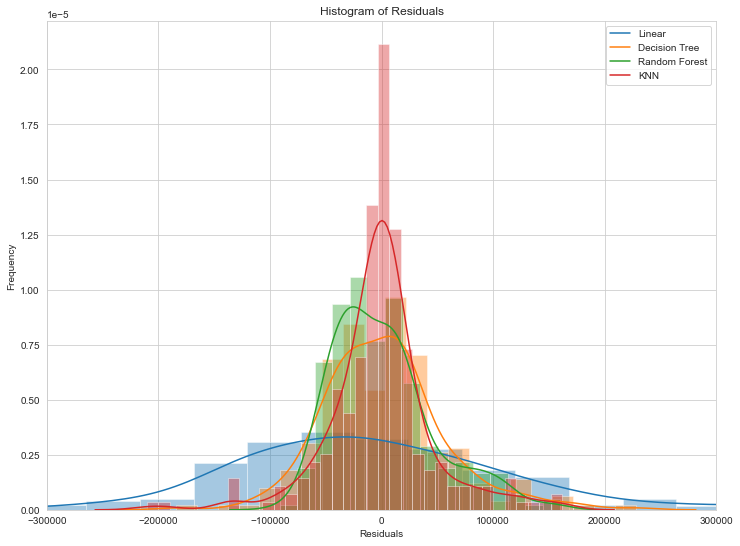

In [11]:
# Checking Normality of errors
plt.figure(figsize=(12,9))
sb.distplot(y_test-ols_yhat)
sb.distplot(y_test-dt_yhat)
sb.distplot(y_test-rf_yhat)
sb.distplot(y_test-knn_yhat)

plt.title("Histogram of Residuals")
plt.xlim([-300000, 300000])
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend(["Linear","Decision Tree","Random Forest","KNN"])
plt.show()

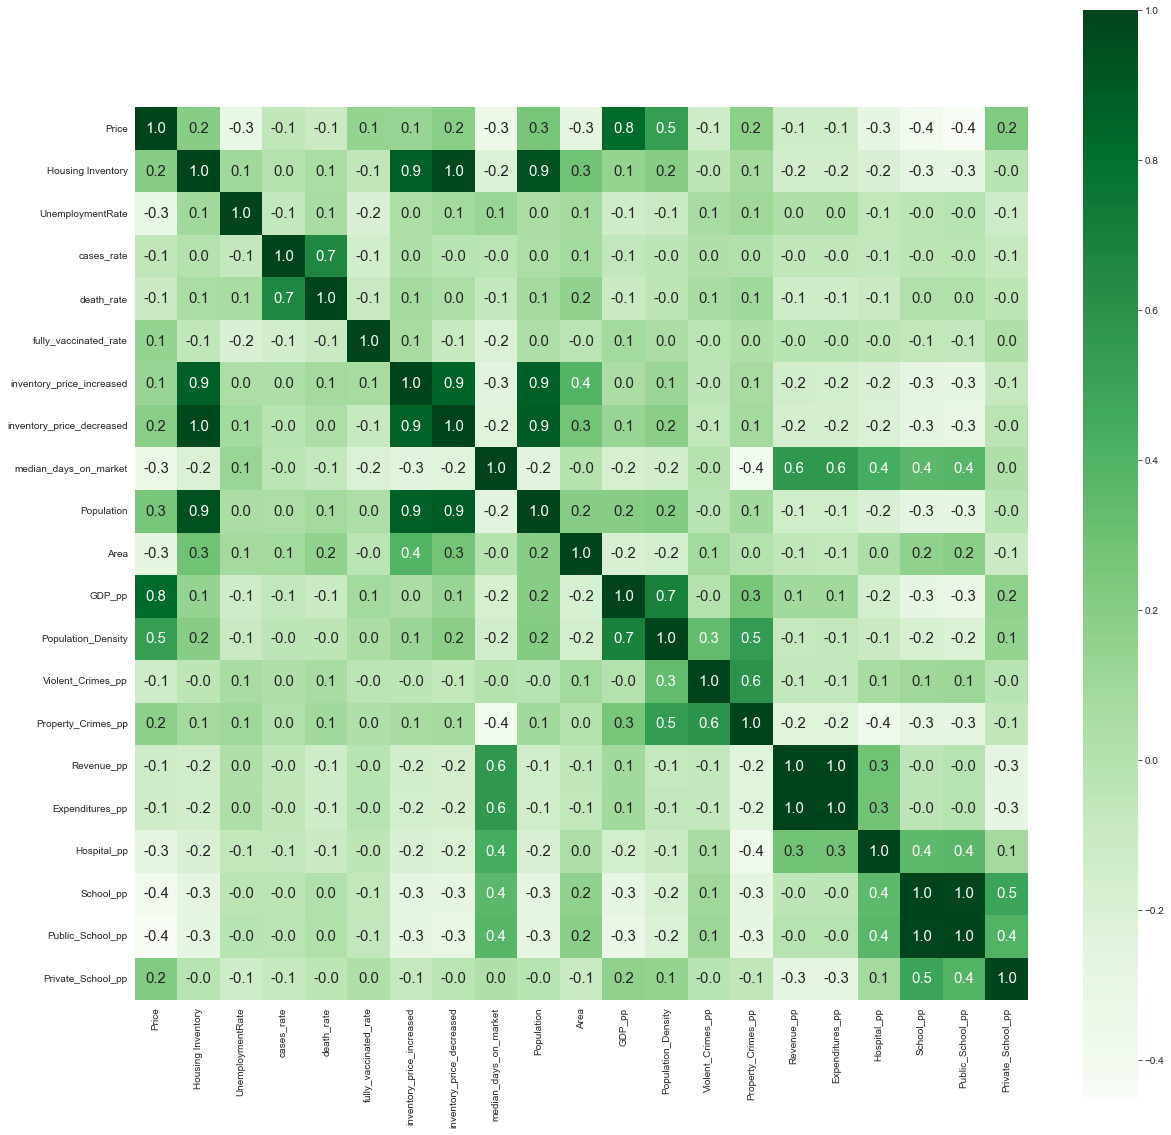

In [12]:
# print(df.isnull().sum())
# print(df.dtypes)

corr = df.corr()
corr.shape

# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()